In [16]:
import os
import regex as re
import pandas as pd
import matplotlib.pyplot as plt

ustawy = []
for filename in os.listdir("ustawy/"):
    with open(f"ustawy/{filename}") as f:
        text = f.read()
        ustawy.append(" ".join(text.replace("\n", " ").replace("\t", "").split()))


In [62]:
def find_year(text: str):
    year = re.findall("(?<=z dnia [0-9]+ \w+ )[0-9]+", text)
    return year[0]

In [717]:
def find_additions(text: str):
    additions = re.findall(
        r"[Dd]oda\w* (?:się|są|jest|zostają|zostają)+ (?:[Pp]kt|[Pp]kt.|[Aa]rt|[Aa]rt.|[Uu]st|[Uu]st.|§|[Dd]zia[lł])+ [0-9]+[a-z]?+",
        text,
    )
    return additions


def find_removals(text: str):
    removals = re.findall(
        r"(?:(?:[Pp]kt|[Pp]kt.|[Aa]rt|[Aa]rt.|[Uu]st|[Uu]st.|§|[Dd]zia[lł]) [0-9]+[a-z]?+)+ skre[śs]\w+ (?:się|są|jest|zostają|zostaje)*",
        text,
    )
    return removals


def find_changes(text: str):
    changes = re.findall(
        r"(?:(?:[Pp]kt|[Pp]kt.|[Aa]rt|[Aa]rt.|[Uu]st|[Uu]st.|§|[Dd]zia[lł]) [0-9]+[a-z]?+)+ otrzym\w+ brzmienie",
        text,
    )
    return changes

In [718]:
total_ustawa_zdania = []
for rok, ustawy_list in ustawy_lata.items():
    for ustawa in ustawy_list:
        if len(find_additions(ustawa)) != 0:
            print(find_additions(ustawa))

['dodaje się art. 343', 'dodaje się art. 365', 'dodaje się § 3', 'dodaje się § 3', 'dodaje się art. 680', 'dodaje się art. 685', 'dodaje się art. 688', 'dodaje się art. 691', 'dodaje się ust. 4']
['dodaje się pkt 8', 'dodaje się ust. 2a', 'dodaje się pkt 6', 'dodaje się pkt 4a']
['dodaje się pkt 18', 'dodaje się art. 5a', 'dodaje się pkt 11', 'dodaje się pkt 4', 'dodaje się ust. 4', 'dodaje się ust. 4', 'dodaje się ust. 2', 'dodaje się art. 21a', 'dodaje się art. 22a', 'dodaje się art. 35a', 'dodaje się pkt 5', 'dodaje się art. 42a', 'dodaje się pkt 5', 'dodaje się ust. 2']
['dodaje się pkt 5', 'dodaje się pkt 6a', 'dodaje się ust. 5', 'dodaje się art. 13a', 'dodaje się art. 26a', 'dodaje się art. 40a', 'dodaje się art. 63b', 'dodaje się art. 78a', 'dodaje się ust. 2', 'dodaje się art. 124a', 'dodaje się art. 128a', 'dodaje się ust. 3', 'dodaje się pkt 3a', 'dodaje się ust. 3a', 'dodaje się ust. 6a', 'dodaje się art. 140a', 'dodaje się ust. 6', 'dodaje się ust. 1a']
['dodaje się art. 1

In [338]:
ustawy_lata = {}
for ustawa in ustawy:
    rok = find_year(ustawa)
    if rok in ustawy_lata.keys():
        ustawy_lata[rok].append(ustawa)
    else:
        ustawy_lata[rok] = [ustawa]


In [707]:
all_data = []
for rok, ustawy_list in ustawy_lata.items():
    total_ch = 0
    total_add = 0
    total_rem = 0
    for ustawa in ustawy_list:
        total_ch += len(find_changes(ustawa))
        total_add += len(find_additions(ustawa))
        total_rem += len(find_removals(ustawa))
    all_data.append([rok, total_add, total_rem, total_ch])


In [708]:
df = pd.DataFrame(all_data, columns=["year", "additions", "removals", "changes"])

In [709]:
df.head()


,year,additions,removals,changes
0,2001,1177,284,1385
1,1996,273,118,456
2,2003,294,33,641
3,1997,423,128,660
4,2000,920,327,1382


In [710]:
df["total"] = df["additions"] + df["changes"] + df["removals"]

In [711]:
df.head()


,year,additions,removals,changes,total
0,2001,1177,284,1385,2846
1,1996,273,118,456,847
2,2003,294,33,641,968
3,1997,423,128,660,1211
4,2000,920,327,1382,2629


In [712]:
df["additions%"] = df["additions"] / df["total"]
df["changes%"] = df["changes"] / df["total"]
df["removals%"] = df["removals"] / df["total"]

In [713]:
df.head()


,year,additions,removals,changes,total,additions%,changes%,removals%
0,2001,1177,284,1385,2846,0.413563,0.486648,0.099789
1,1996,273,118,456,847,0.322314,0.538371,0.139315
2,2003,294,33,641,968,0.303719,0.662190,0.034091
3,1997,423,128,660,1211,0.349298,0.545004,0.105698
4,2000,920,327,1382,2629,0.349943,0.525675,0.124382


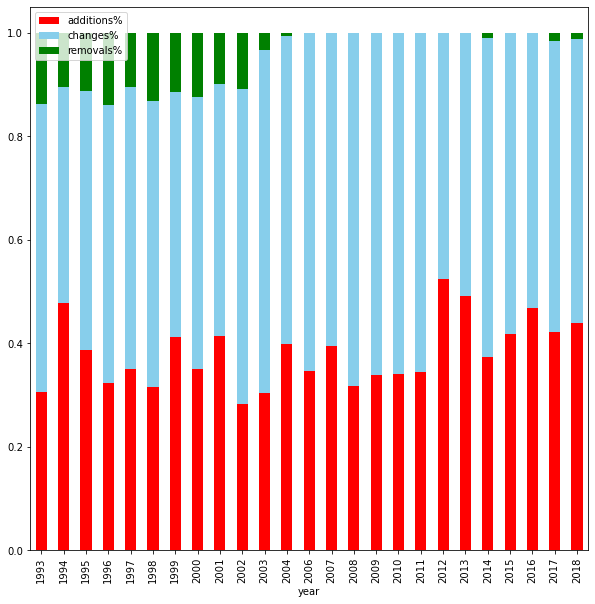

In [714]:
plt.rcParams["figure.figsize"] = (10,10)
df[["additions%", "changes%", "removals%", "year"]].set_index("year").sort_values(
    "year"
).plot(kind="bar", stacked=True, color=["red", "skyblue", "green"])
plt.show()

In [692]:
df.head()

,year,additions,removals,changes,total,additions%,changes%,removals%
0,2001,690,282,1380,2352,0.293367,0.586735,0.119898
1,1996,120,118,456,694,0.172911,0.657061,0.170029
2,2003,169,33,639,841,0.200951,0.759810,0.039239
3,1997,230,128,660,1018,0.225933,0.648330,0.125737
4,2000,502,327,1379,2208,0.227355,0.624547,0.148098


In [660]:
odmiana_list = [
    "ustawa",
    "ustawy",
    "ustawy",
    "ustaw",
    "ustawie",
    "ustawom",
    "ustawę",
    "ustawy",
    "ustawą",
    "ustawami",
    "ustawie",
    "ustawach",
    "ustawo",
    "ustawy"
]

In [661]:
odmiana_list = [rf"\b{x}\b" for x in odmiana_list]

In [662]:
odmiana_list

['\\bustawa\\b',
 '\\bustawy\\b',
 '\\bustawy\\b',
 '\\bustaw\\b',
 '\\bustawie\\b',
 '\\bustawom\\b',
 '\\bustawę\\b',
 '\\bustawy\\b',
 '\\bustawą\\b',
 '\\bustawami\\b',
 '\\bustawie\\b',
 '\\bustawach\\b',
 '\\bustawo\\b',
 '\\bustawy\\b']

In [664]:
def find_ustawa(text:str):
    ustawa = re.findall(rf"\b({'|'.join(odmiana_list)}\b)", text, re.IGNORECASE)
    return ustawa

def find_zdnia(text:str):
    find = re.findall(rf"(\b(?:{'|'.join(odmiana_list)}\b)(?= \bz dnia\b))", text, re.IGNORECASE)
    return find

def find_ustawa_not_zdnia(text:str):
    find = re.findall(rf"(\b(?:{'|'.join(odmiana_list)}\b)(?! \bz dnia\b))", text, re.IGNORECASE)
    return find 

In [670]:
total_ustawa_zdania = []
for rok, ustawy_list in ustawy_lata.items():
    for ustawa in ustawy_list:
        if len(find_ustawa(ustawa)) != 0:
            total_ustawa_zdania.append([len(find_ustawa(ustawa)), len(find_zdnia(ustawa)), len(find_ustawa_not_zdnia(ustawa))])


In [671]:
df_total_ustawa_zdnia = pd.DataFrame(total_ustawa_zdania, columns = ['ustawa', 'ustawa_z_dnia', 'ustawa_not_z_dnia'])

In [672]:
df_total_ustawa_zdnia.head()

,ustawa,ustawa_z_dnia,ustawa_not_z_dnia
0,4,2,2
1,33,16,17
2,13,3,10
3,9,3,6
4,27,5,22


In [675]:
print((df_total_ustawa_zdnia['ustawa'] - df_total_ustawa_zdnia['ustawa_z_dnia'] - df_total_ustawa_zdnia["ustawa_not_z_dnia"] == 0).all())

True


In [683]:
sum_df = df_total_ustawa_zdnia.sum()

In [682]:
sum_df.head()

,index,0
0,ustawa,24934
1,ustawa_z_dnia,8587
2,ustawa_not_z_dnia,16347


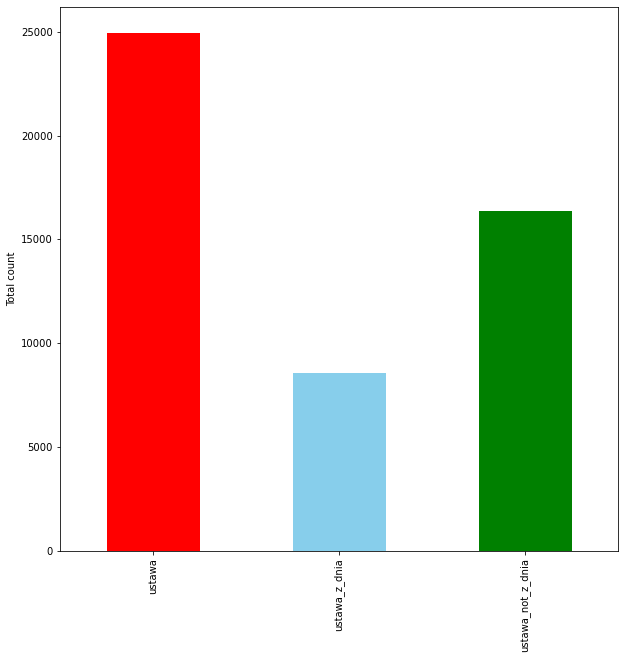

In [689]:
plt.rcParams["figure.figsize"] = (10,10)
sum_df.plot(kind="bar", color=["red", "skyblue", "green"])
plt.ylabel('Total count')
plt.show()

In [723]:
def find_ustawa_not_o_zmianie(text:str):
    ustawa = re.findall(rf"(?! \bo zmianie\b) \b({'|'.join(odmiana_list)}\b)", text, re.IGNORECASE)
    return ustawa

In [727]:
total_ustawa= 0
for rok, ustawy_list in ustawy_lata.items():
    for ustawa in ustawy_list:
        if len(find_ustawa_not_o_zmianie(ustawa)) != 0:
            total_ustawa = total_ustawa + len(find_ustawa_not_o_zmianie(ustawa))


In [728]:
total_ustawa

24843